# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
print('Data Types:\n', customers.dtypes, '\n')  # no categorical data to convert
print('NA count:\n', customers.isna().sum())  # no missing data to remove

Data Types:
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

NA count:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
customers.corr()
# Channel with Detergents_Paper seems to have a decent correlation - 0.64
# Milk with Detergents_Paper seems to have a decent correlation - 0.66
# Channel with Grocery seems to have a decent correlation - 0.61
# Grocery with Detergents_Paper seems to have a super high correlation - 0.92

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [5]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


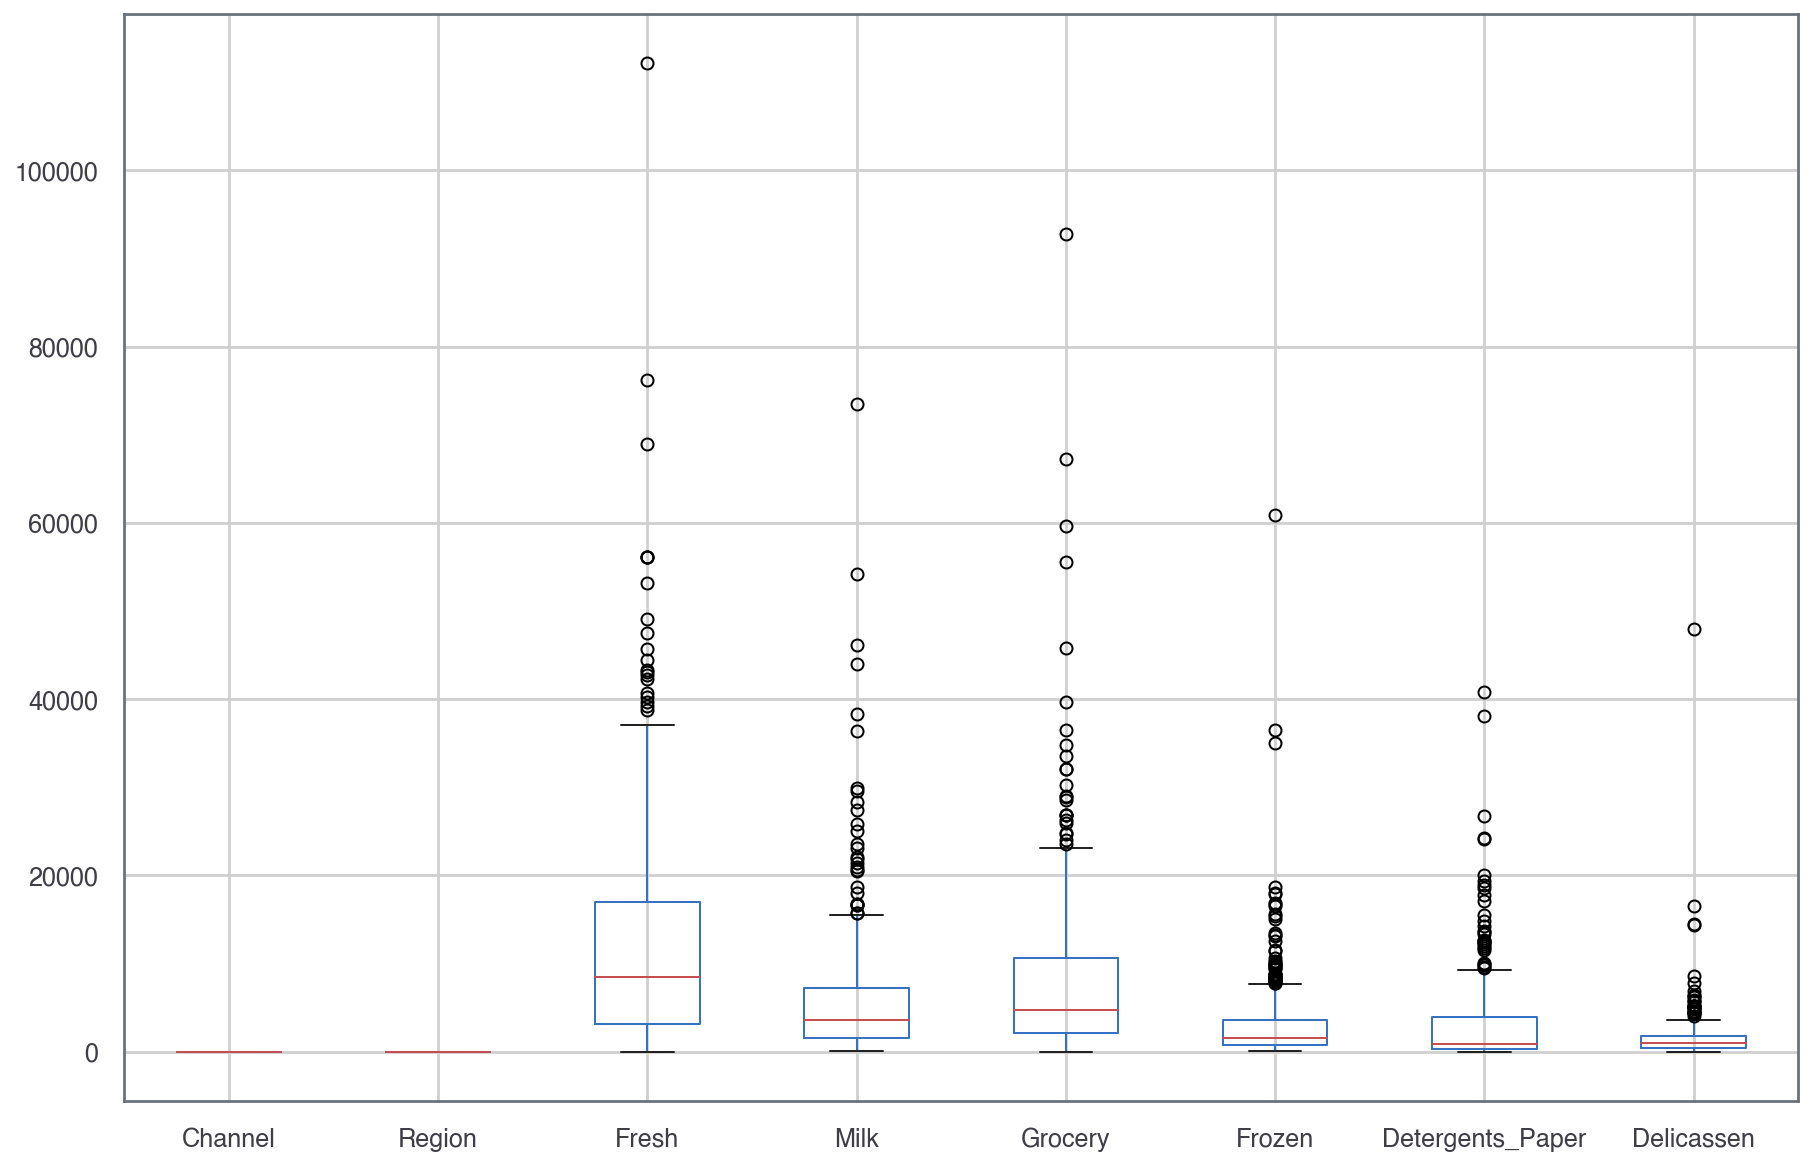

In [6]:
customers.boxplot(figsize = (15, 10));  # there seems to be a crazy amount of outliers...?

In [ ]:
'''fig, axs = plt.subplots(3, 2, figsize = (20, 12))
axs = axs.ravel()

# Tried making it nicer with subplots but it wasn't working
for k in range(9):
    for i in customers_clean.columns:
        if i != 'Channel' and i != 'Region':
            plt.gca()#(axs[k])
            sns.distplot(customers_clean[i])
            plt.show()
'''

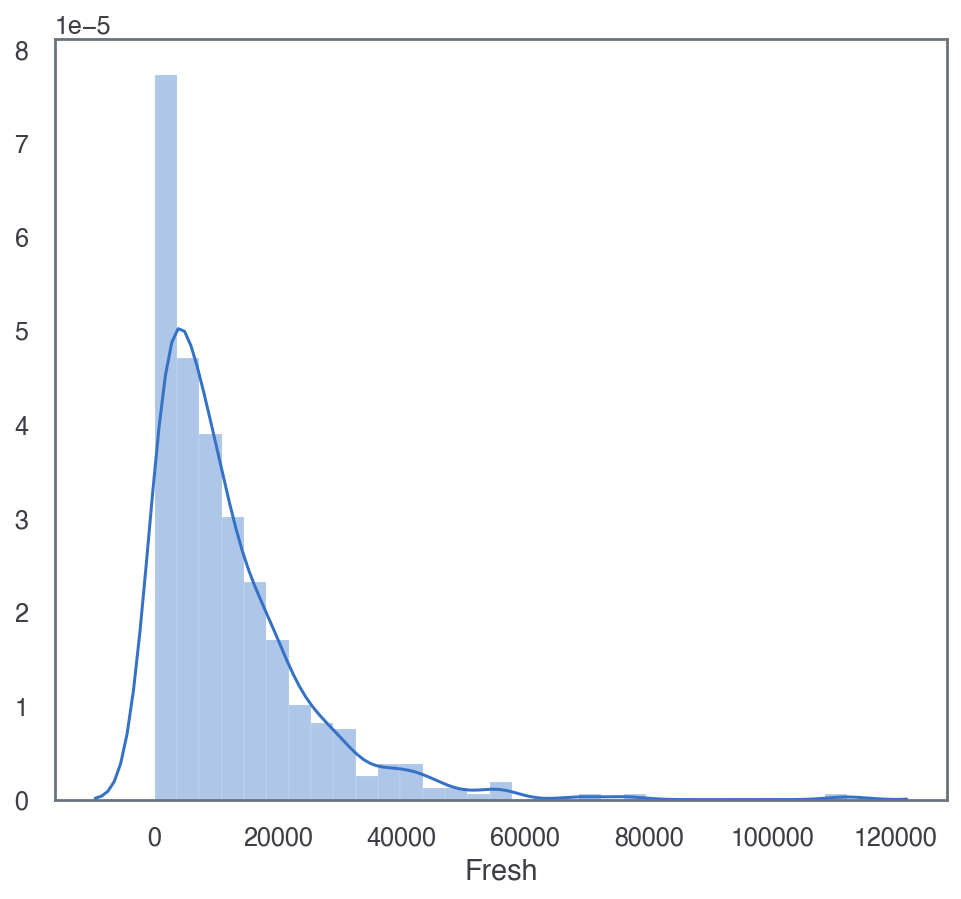

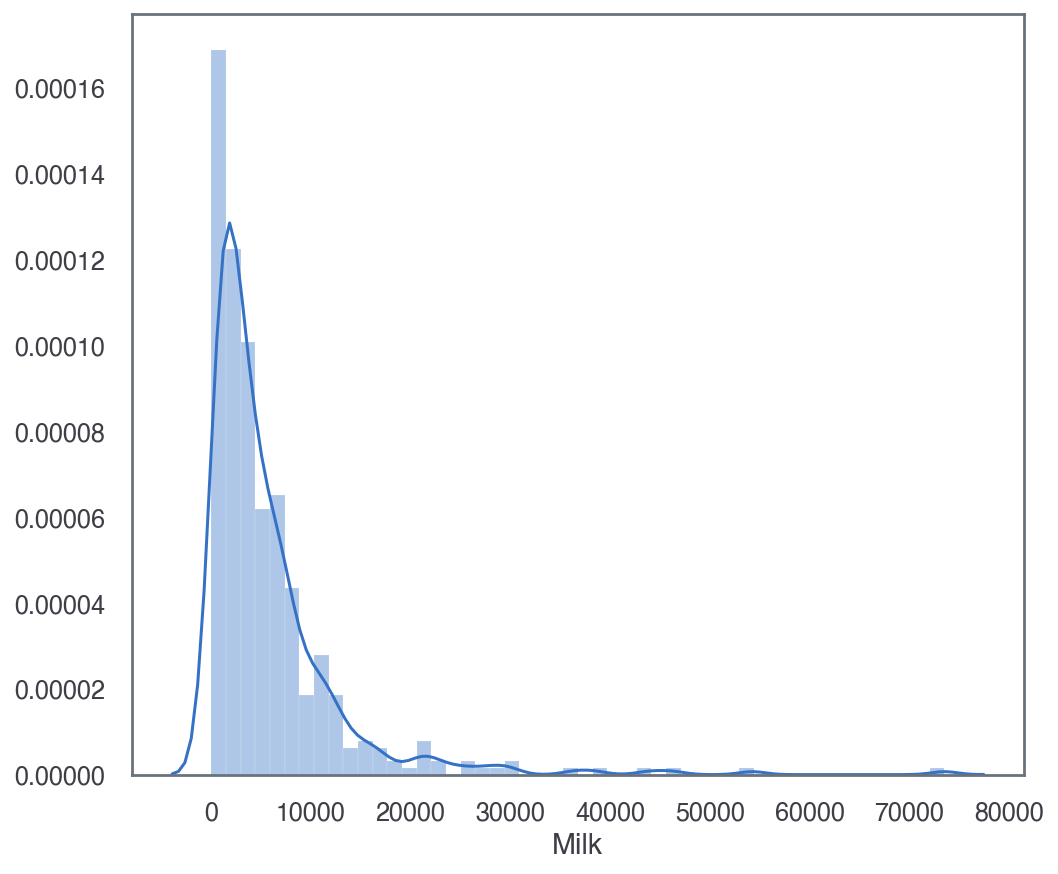

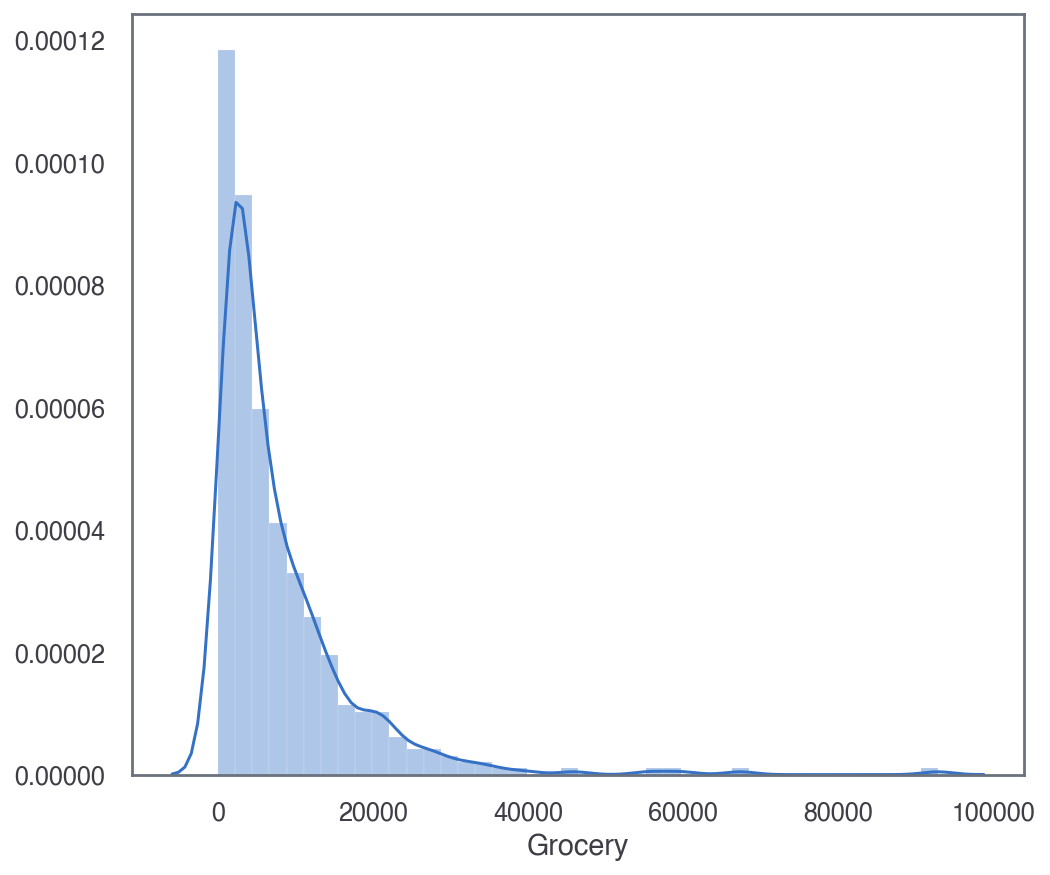

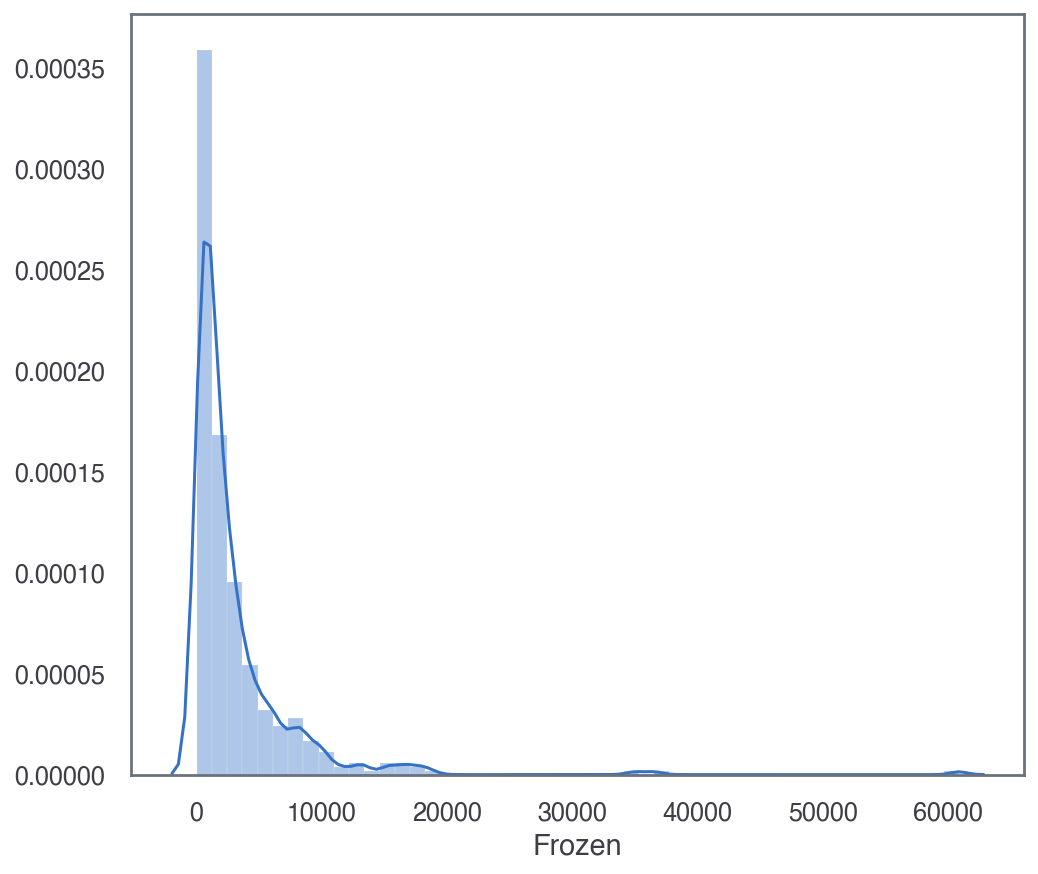

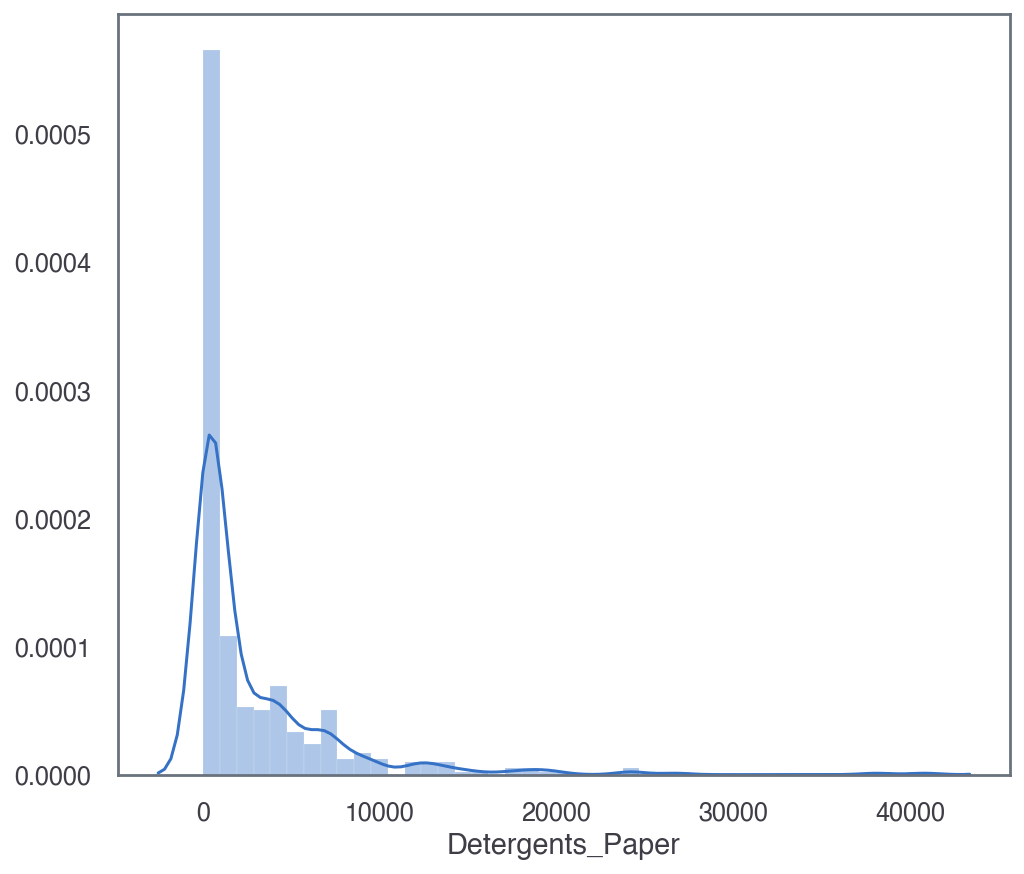

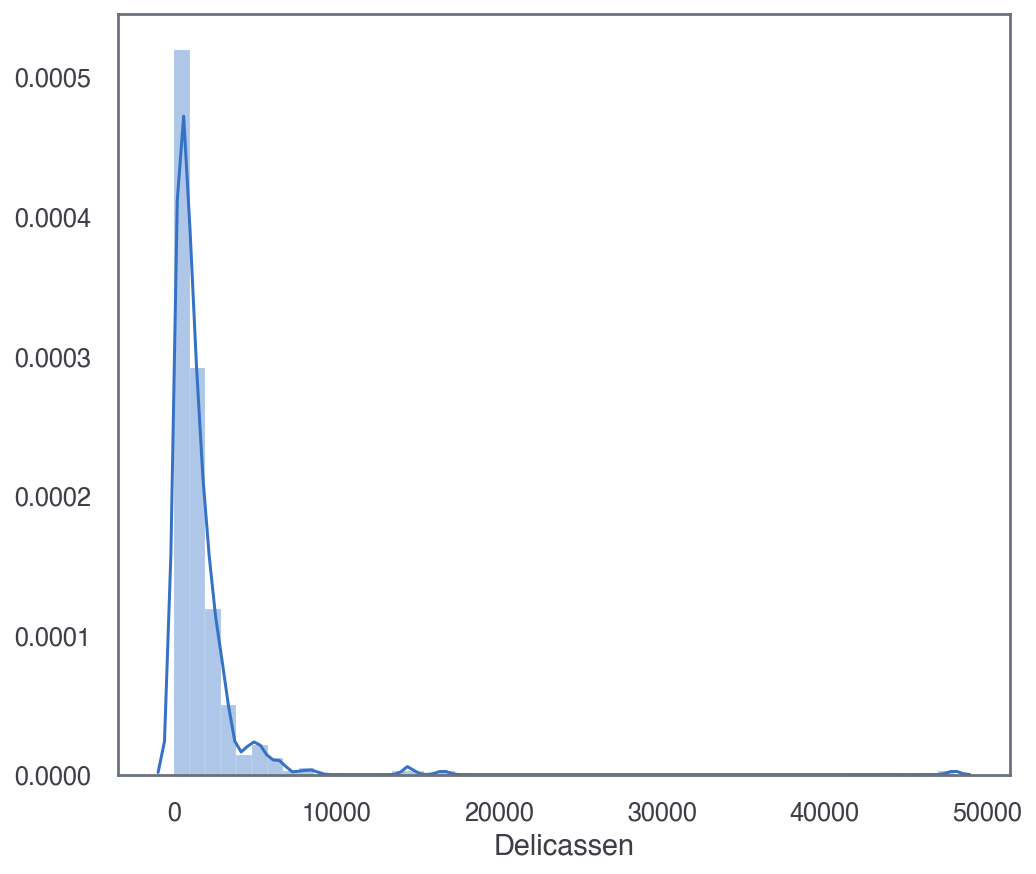

In [9]:
# Plots showing the distributions for each column apart from those 2
for i in customers.columns:
    if i != 'Channel' and i != 'Region':
        sns.distplot(customers[i])
        plt.show()

In [ ]:
# Your observations here
'''
There seems to be a lot of outliers, which will be removed below.
Other comments were made inside each cell.
From the plots we can gather that all the columns seem to be right skewed.
'''

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

Number of outliers/rows removed: 26


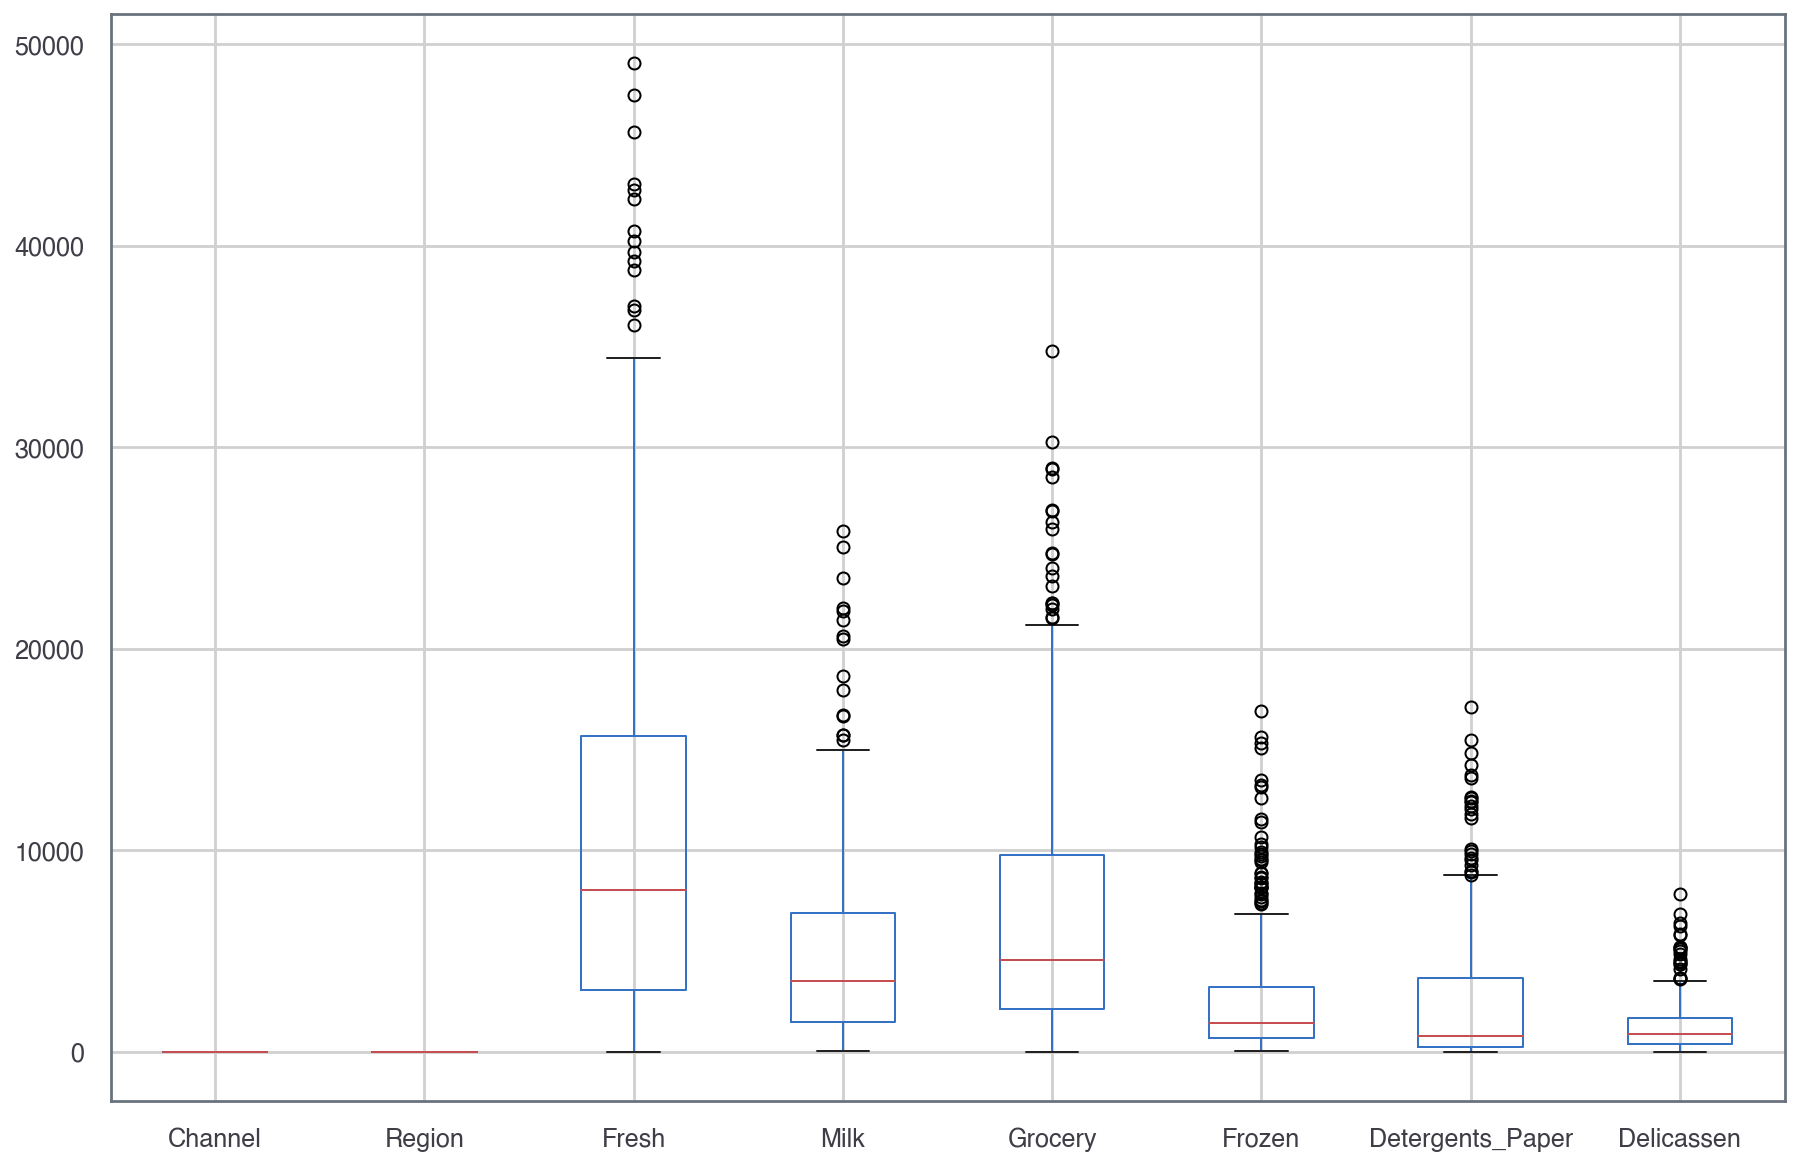

In [10]:
# Your code here

# Removing the outliers with Z-score as I like it better and it removes less than the IQR method
def z_score_outliers(df, threshold = 3):
    '''
    Takes a DataFrame as input, and a default threshold (3), which can be changed, and returns the cleaned DataFrame,
    without the outliers.
    '''
    z = np.abs(zscore(df))
    df_clean = df[(z < 3).all(axis = 1)]
    print('Number of outliers/rows removed:', df.shape[0] - df_clean.shape[0])
    return df_clean

#customers_clean = z_score_outliers(customers.drop(columns = ['Channel', 'Region'])) # didn't seem to remove less??
customers_clean = z_score_outliers(customers)

customers_clean.boxplot(figsize = (15, 10));  # still seems to be a lot of outliers but it looks better? Not so spread

In [11]:
# Doubts whether it should have removed values from these columns (channel and region) or not

# Adding those 2 columns back to the dataframe
#customers_clean = customers_clean.join(customers[['Channel', 'Region']]) # it wasn't working for some reason
### same amount was being removed - values weren't matching when they should

print(customers['Channel'].value_counts())
print(customers_clean['Channel'].value_counts())

1    298
2    142
Name: Channel, dtype: int64
1    284
2    130
Name: Channel, dtype: int64


In [ ]:
# Your comment here
'''
Think everything is ok now?
'''

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [12]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers_clean)  # maybe I shouldn't scale channel and region?

#test = pd.DataFrame(customers_scale, columns = customers_clean.columns)  # if I want it back as a DF

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [13]:
# Your code here:
from sklearn.cluster import KMeans

# Creating the K-Mean object
cluster = KMeans(n_clusters = 3, random_state = 18, n_jobs = -1)

# Training the model
model = cluster.fit(customers_scale)

# Creating the labels column
customers_clean['labels_KMean'] = model.labels_  # should it be here? Or on the new DF that I could create already scaled?
customers_clean

/Users/mattymrc/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMean
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


Count the values in `labels`.

In [14]:
# Your code here:
customers_clean['labels_KMean'].value_counts()

1    208
0    125
2     81
Name: labels_KMean, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
# Your code here
from sklearn.cluster import DBSCAN

# Scaling was done above and using it

# Create meanshift object
db_cluster = DBSCAN(n_jobs = -1)  # eps = 0.5 is the default

# Train model
db_model = db_cluster.fit(customers_scale)

# Creating the labels_DBSCAN column
customers_clean['labels_DBSCAN'] = db_model.labels_

/Users/mattymrc/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Count the values in `labels_DBSCAN`.

In [16]:
# Your code here
customers_clean['labels_DBSCAN'].value_counts()

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

In [19]:
customers_clean

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_KMean,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,2,-1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2,-1
436,1,3,39228,1431,764,4510,93,2346,2,-1
437,2,3,14531,15488,30243,437,14841,1867,0,-1
438,1,3,10290,1981,2232,1038,168,2125,1,-1


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

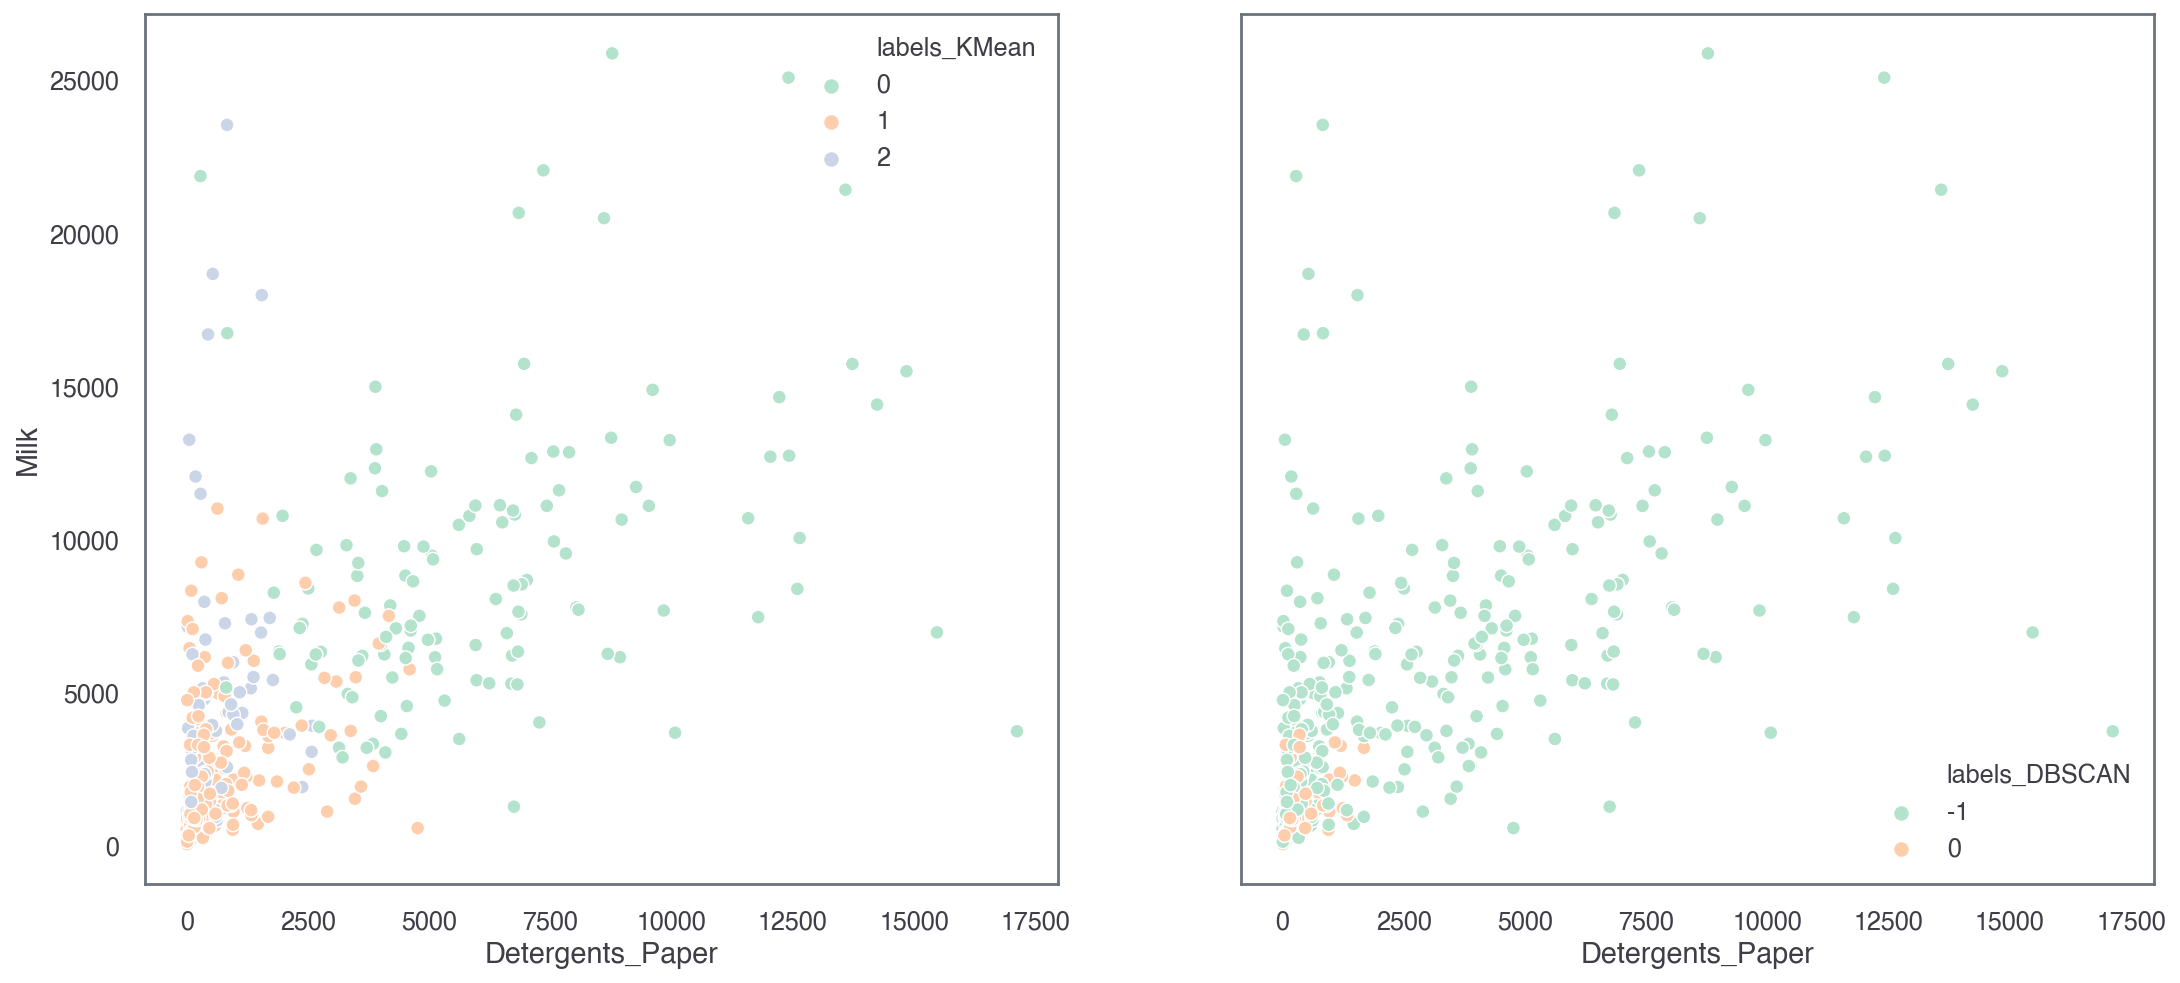

In [51]:
# Your code here:
fig, axs = plt.subplots(1, 2, figsize = (18, 8), sharey = True)

plt.sca(axs[0])
sns.scatterplot(x = 'Detergents_Paper', y = 'Milk', hue = 'labels_KMean', data = customers_clean, palette = "Pastel2")

plt.sca(axs[1])
sns.scatterplot(x = 'Detergents_Paper', y = 'Milk', hue = 'labels_DBSCAN', data = customers_clean, palette = "Pastel2");

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

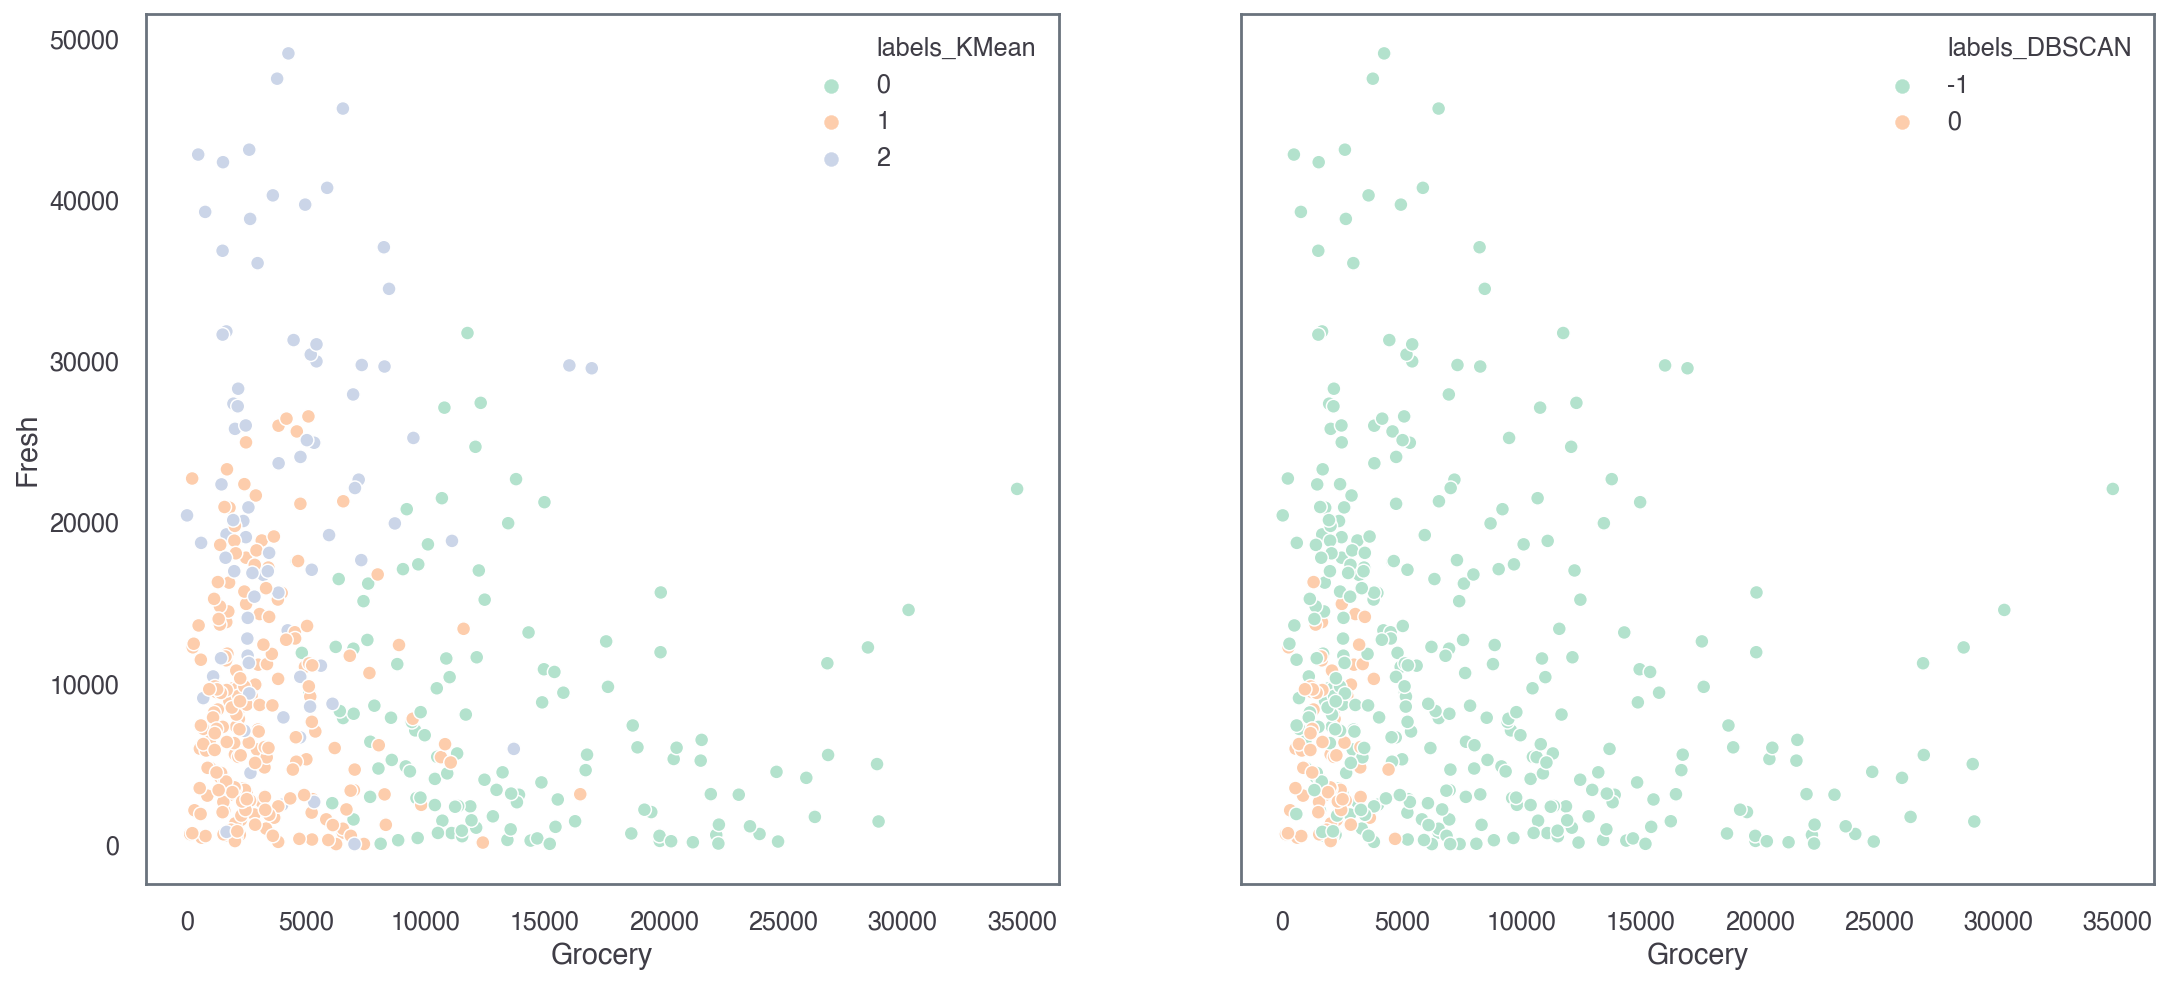

In [52]:
# Your code here:
fig, axs = plt.subplots(1, 2, figsize = (18, 8), sharey = True)

plt.sca(axs[0])
sns.scatterplot(x = 'Grocery', y = 'Fresh', hue = 'labels_KMean', data = customers_clean, palette = "Pastel2")

plt.sca(axs[1])
sns.scatterplot(x = 'Grocery', y = 'Fresh', hue = 'labels_DBSCAN', data = customers_clean, palette = "Pastel2");

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

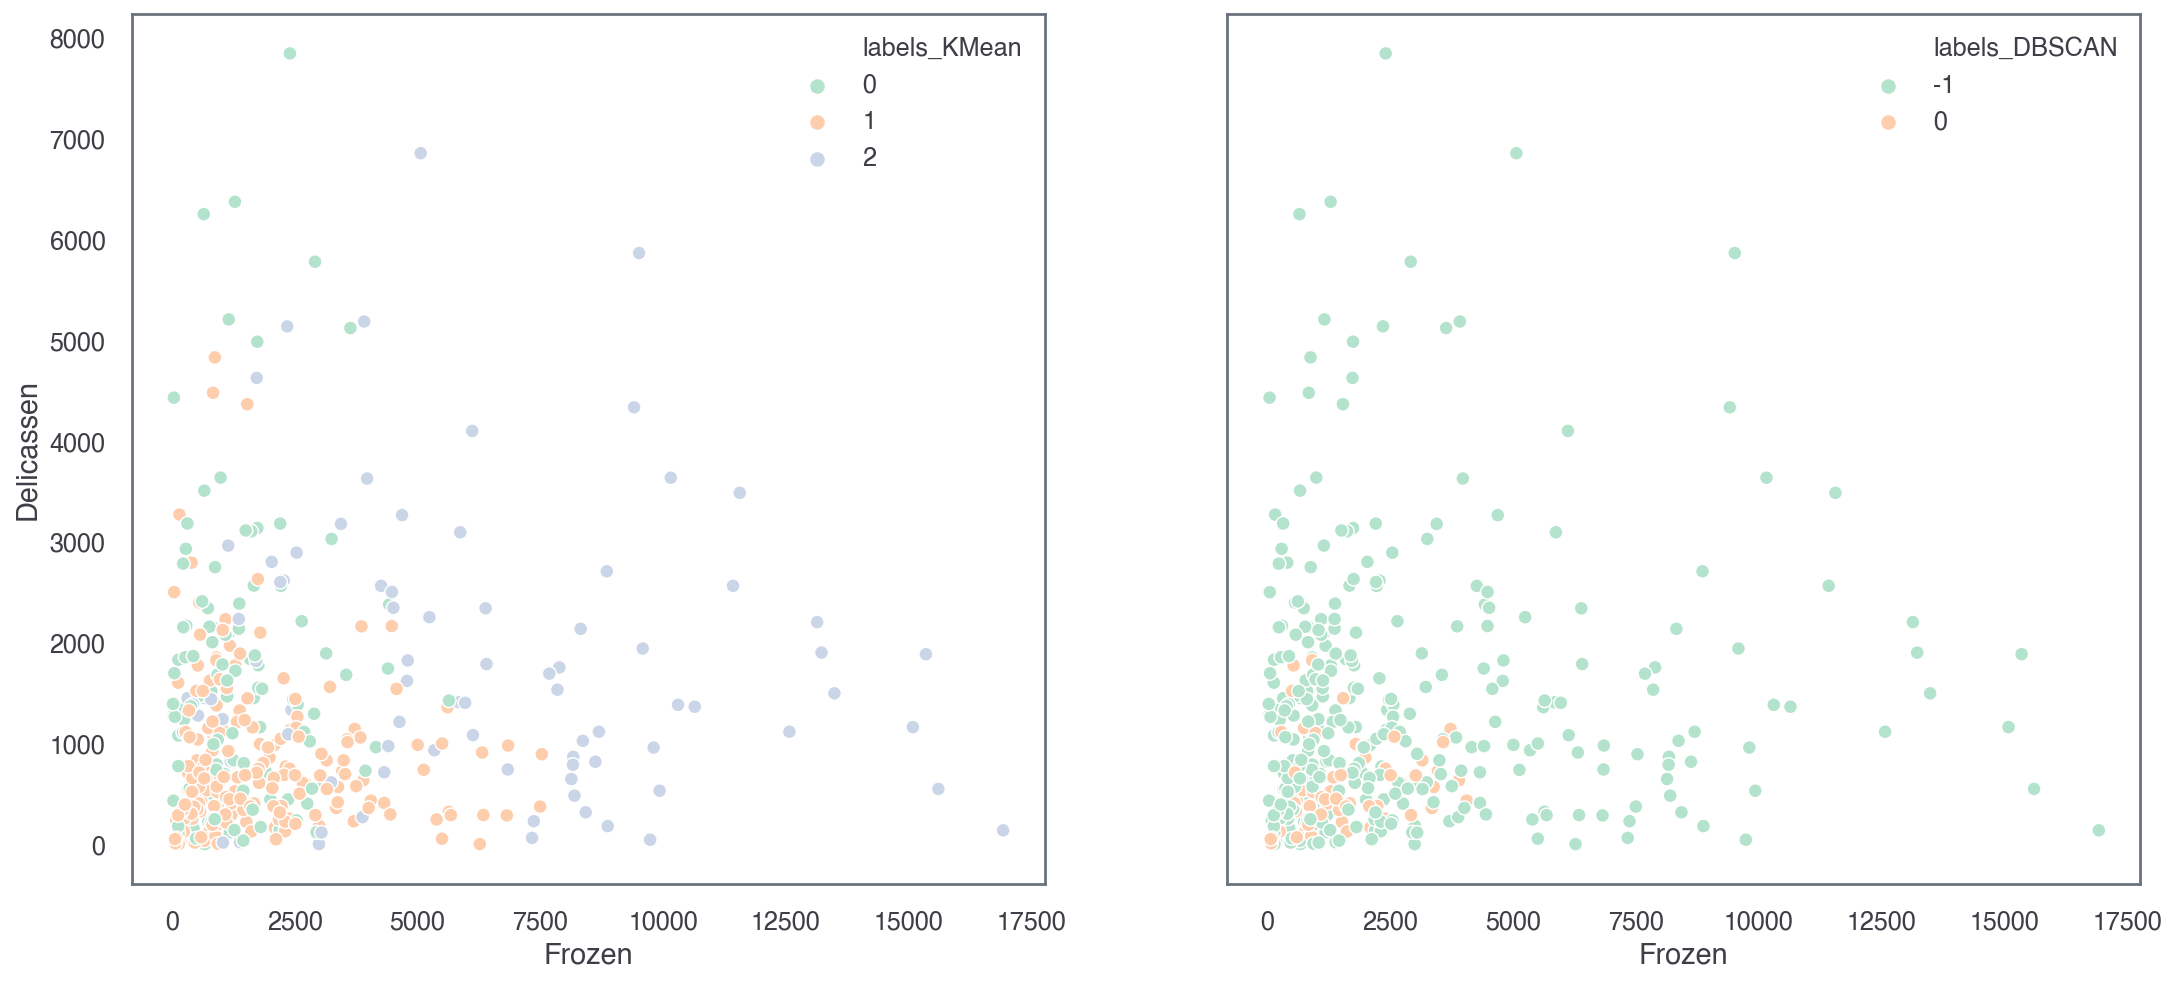

In [53]:
# Your code here:
fig, axs = plt.subplots(1, 2, figsize = (18, 8), sharey = True)

plt.sca(axs[0])
sns.scatterplot(x = 'Frozen', y = 'Delicassen', hue = 'labels_KMean', data = customers_clean, palette = "Pastel2")

plt.sca(axs[1])
sns.scatterplot(x = 'Frozen', y = 'Delicassen', hue = 'labels_DBSCAN', data = customers_clean, palette = "Pastel2");

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [75]:
# Your code here:
customers_clean.columns

customers_clean.groupby('labels_KMean').mean().drop('labels_DBSCAN', axis = 1)#.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_KMean,,,,,,,,
0,1.960000,2.648000,7325.880000,9141.216000,14305.528000,1320.632000,6228.008000,1564.528000
1,1.019231,2.471154,8191.201923,2519.644231,3270.274038,1791.908654,734.937500,818.216346
2,1.074074,2.592593,22409.419753,4323.913580,4353.160494,6393.358025,632.308642,1811.753086


In [76]:
customers_clean.groupby('labels_DBSCAN').mean().drop('labels_KMean', axis = 1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,,,
-1,1.379009,2.45481,11641.819242,5565.478134,7822.857143,2781.938776,2779.647230,1377.119534
0,1.000000,3.00000,6218.647887,1521.352113,1940.478873,1428.915493,410.788732,565.563380


Which algorithm appears to perform better?

In [ ]:
# Your observations here
'''
I don't know how to evaluate these models based just on their means.
The fact that the cluster sizes are different will surely impact this change, so I don't know...
From the plots we can see the values are all very spread, there is usually a good concentration of values around 0 to
2500-5000 for each plot, but then the other values are all very disperse.
'''

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here